<div align="center">

# <span style="font-size: 2em;">Welcome to Linear Regression!</span>

</div>

<p align="center">
  <img src="regressionpng" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">Supervised Learning!</span>

</div>

In this notebook, I implement the single neuron model together with the gradient descent algorithm in order to solve the **linear regression problem**. This notebook will focus on single variable regression for a single species of Matatus in a Synthtic data set I created.

## Regression

Let $X$ be the space of all possible feature vectors, let $Y$ be the space of all possible corresponding labels for the feature vectors, and let $f: X \to Y$ be the optimal target function assigning labels to feature vectors in $Y$. Next recall that in supervised machine learning, we observe some subset of features and labels as shown conceptually in the figure below.

**Supervised Machine Learning**

In **regression**, machine learning models are given labeled data $D = \{(\mathbf{x}^{(1)}, y^{(1)}), \dots, (\mathbf{x}^{(N)}, y^{(N)}) \}$, where the feature vectors satisfy $\mathbf{x}^{(i)} \in \mathbb{R}^d$ (with $d$ being the number of features) and the target labels satisfy $y^{(i)} \in \mathbb{R}$ (i.e., they are real numbers). Thus, this supervised learning task seeks to predict **real-valued target labels**. This is different from classification (such as the perceptron single neuron model), which seeks to predict discrete categories, as the following figure suggests.

I begin by sythesis of the data.


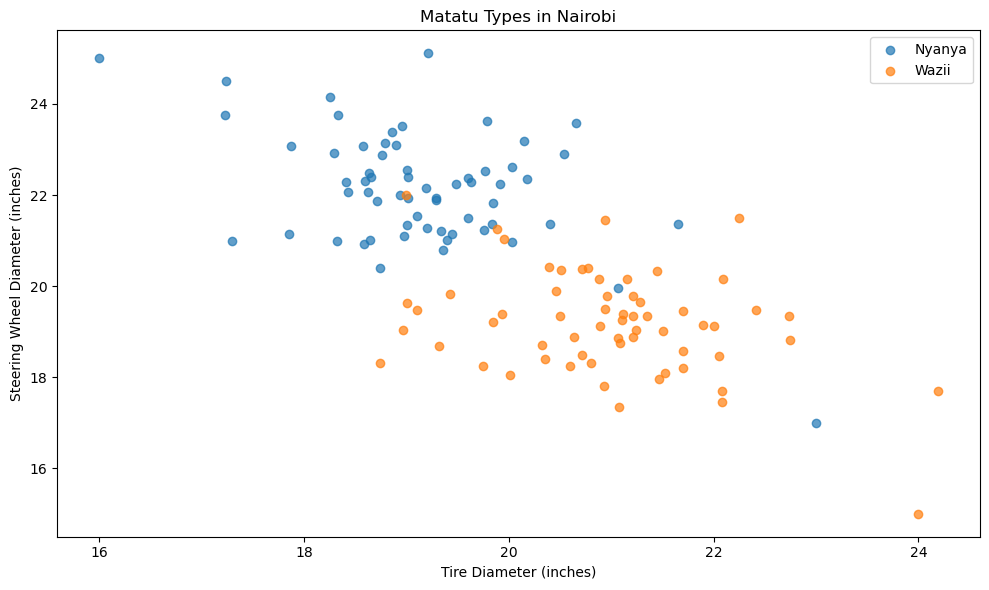

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


nyanya_tire_diameter = np.random.normal(19, 1, 60)
nyanya_steering_diameter = np.random.normal(22, 1, 60)

# Wazii: Tire diameter > 20, Steering wheel <= 20
wazii_tire_diameter = np.random.normal(21, 1, 60)
wazii_steering_diameter = np.random.normal(19, 1, 60)

# Add some outliers
nyanya_tire_diameter = np.append(nyanya_tire_diameter, [16, 23])
nyanya_steering_diameter = np.append(nyanya_steering_diameter, [25, 17])

wazii_tire_diameter = np.append(wazii_tire_diameter, [24, 19])
wazii_steering_diameter = np.append(wazii_steering_diameter, [15, 22])

# Combine the data into a DataFrame
data_close = pd.DataFrame({
    'Tire_Diameter': np.concatenate([nyanya_tire_diameter, wazii_tire_diameter]),
    'Steering_Diameter': np.concatenate([nyanya_steering_diameter, wazii_steering_diameter]),
    'Type': ['Nyanya'] * len(nyanya_tire_diameter) + ['Wazii'] * len(wazii_tire_diameter)
})

# Create scatter plot
plt.figure(figsize=(10, 6))
for label, color in zip(['Nyanya', 'Wazii'], ['blue', 'red']):
    subset = data_close[data_close['Type'] == label]
    plt.scatter(subset['Tire_Diameter'], subset['Steering_Diameter'], label=label, alpha=0.7)


plt.xlabel('Tire Diameter (inches)')
plt.ylabel('Steering Wheel Diameter (inches)')
plt.title('Matatu Types in Nairobi')
plt.legend()
plt.tight_layout()
plt.show()

## The idea here is What if we could predict the Tire_Diameter based on the steering_wheel diamete r? We can do that with a regression algorithm.

## Model Setup: Single Neuron with Linear Activation and MSE Cost

Working under the assumption that the underlying target function $f: X \to Y$ exhibits a **linear relationship** with the input features, and recognizing that single neuron models serve as effective function approximators, our approach is to construct a **single neuron model**. To align with the linearity assumption, we specifically select a **linear activation function** for this neuron (meaning the neuron's output is simply its net input: $\hat{y} = z = w_1 x + b$).

To quantify the discrepancy between the model's predictions ($\hat{y}^{(i)}$) and the actual target values ($y^{(i)}$) during training, we adopt the **Mean Squared Error (MSE)** as our cost function, $C(w_1, b)$. This function averages the squared differences across all $N$ data points in the training set:

$$ C(w_1, b) = \frac{1}{2N} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)})^2 $$

Applying this framework to our specific task—linear regression using only the sepal length feature ($x$) for the Setosa species ($y$) in the Iris dataset—results in the single neuron architecture illustrated conceptually below. This model incorporates both the chosen linear activation and the MSE cost function, which we will subsequently aim to minimize.

*(Conceptual placeholder for Single Neuron Model diagram for Linear Regression)*
**Single Neuron Model for Linear Regression (Linear Activation, MSE Cost)**

## Minimizing the Cost Function $C(w_1, b)$

To effectively train our `SingleNeuron` model (before defining the class itself), we must first address the minimization of its associated cost function, denoted as $C(w_1, b)$. Our objective is to find the parameters $w_1$ (weight) and $b$ (bias) that solve the following optimization problem:

$$ \min_{w_1, b} C(w_1, b) $$

Given that the cost function $C(w_1, b)$ is differentiable with respect to both $w_1$ and $b$, a common approach to solve this minimization problem is the **gradient descent algorithm**. This iterative method updates the parameters in the opposite direction of the cost function's gradient:

$$ w_1 \leftarrow w_1 - \alpha \frac{\partial C}{\partial w_1} $$
$$ b \leftarrow b - \alpha \frac{\partial C}{\partial b} $$

Here, $\alpha$ represents the learning rate, a hyperparameter controlling the step size of each update.

### Calculating the Gradient Components for $C(w_1, b)$

To implement the gradient descent updates, we need the partial derivatives of the cost function $C(w_1, b)$ with respect to $w_1$ and $b$. Let's first consider how these are computed over the available training data.

Suppose, for simplicity, we calculate the Mean Squared Error (MSE) cost based on a **single data example** $(\mathbf{x}^{(i)}, y^{(i)})$, meaning $N=1$. For this individual example, the MSE cost function takes the form:

$$ C(w_1, b; x^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2 $$

where $\hat{y}^{(i)}$ is the neuron's prediction for input $x^{(i)}$. In the specific case of a neuron with a **linear activation function**, the prediction $\hat{y}^{(i)}$ (which equals the activation $a$, which equals the net input $z$ in this simple case) is a direct linear function of $w_1$ and $b$:

$$ \hat{y}^{(i)} = a = z = w_1 x^{(i)} + b $$

Substituting this into the cost function for our single observation yields:

$$ C(w_1, b; x^{(i)}, y^{(i)}) = \frac{1}{2}(w_1 x^{(i)} + b - y^{(i)})^2 $$

Using this expression, we can readily compute the partial derivatives $\frac{\partial C}{\partial w_1}$ and $\frac{\partial C}{\partial b}$ by applying the **chain rule**:

$$ \frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial w_1} = (w_1 x^{(i)} + b - y^{(i)}) \cdot x^{(i)} = (\hat{y}^{(i)} - y^{(i)}) x^{(i)} $$

$$ \frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial b} = (w_1 x^{(i)} + b - y^{(i)}) \cdot 1 = (\hat{y}^{(i)} - y^{(i)}) $$

Understanding how to compute these partial derivatives is fundamental for applying any first-order optimization technique like gradient descent to minimize $C(w_1, b)$. We will now explore two primary methods for utilizing these gradient calculations across the entire dataset.

### Gradient Calculation Approaches

The calculation derived above for a single data instance can be extended to the entire training set. One way is to compute the average gradient over all $N$ training examples. This gives the **full gradient** with respect to the complete training data $(X, y)$:

$$ \frac{\partial C(w_1, b; X, y)}{\partial w_1} = \frac{1}{N} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) x^{(i)} $$

$$ \frac{\partial C(w_1, b; X, y)}{\partial b} = \frac{1}{N} \sum_{i=1}^N (\hat{y}^{(i)} - y^{(i)}) $$

Using this full gradient within the gradient descent update rule leads to our first optimization variant.

**Approach 1: Batch Gradient Descent**

The Batch Gradient Descent algorithm proceeds as follows:

1.  **For each epoch (pass through the data):**
    * Compute the *full gradient* components $\frac{\partial C(w_1, b; X, y)}{\partial w_1}$ and $\frac{\partial C(w_1, b; X, y)}{\partial b}$ by summing/averaging over *all* $N$ training examples.
    * Update the parameters $w_1$ and $b$ *once* using these full gradients:
        $$ w_1 \leftarrow w_1 - \alpha \frac{\partial C(w_1, b; X, y)}{\partial w_1} $$
        $$ b \leftarrow b - \alpha \frac{\partial C(w_1, b; X, y)}{\partial b} $$

While Batch Gradient Descent provides a stable update direction, it can be computationally expensive and require significant memory, especially when the training dataset (N) is very large. Furthermore, computing the full gradient isn't strictly necessary to converge towards a minimum.

A more common and often more efficient alternative involves updating the parameters based on individual data points.

**Approach 2: Stochastic Gradient Descent (SGD)**

This technique updates the parameters $w_1$ and $b$ iteratively, using the gradient calculated from **one training example at a time**:

1.  **For each epoch:**
    * **For each training example $i = 1, \dots, N$:**
        * Calculate the gradient components $\frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial b}$ using *only* the current example $(\mathbf{x}^{(i)}, y^{(i)})$.
        * Update the parameters $w_1$ and $b$ *immediately*:
            $$ w_1 \leftarrow w_1 - \alpha \frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial w_1} $$
            $$ b \leftarrow b - \alpha \frac{\partial C(w_1, b; x^{(i)}, y^{(i)})}{\partial b} $$

Stochastic Gradient Descent is widely used for training both simple neuron models and complex deep neural networks. Although the updates are noisier (due to using single examples), it is generally much faster per update, requires less memory, and can sometimes help escape shallow local minima. For practical purposes with single neuron models, SGD is often the preferred optimization strategy. We will utilize stochastic gradient descent within the `train` method of the forthcoming `SingleNeuron` class implementation.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron.

    Attributes
    ----------
    activation_function : function
        The activation function applied (identity for linear regression).
    w_ : numpy.ndarray
        Weights and bias [w1, w2, ..., bias]. Initialized in __init__.
    errors_: list
        Mean of (0.5 * error^2) per epoch during training.
    """
    def __init__(self, activation_function, n_features):
        """
        Initializes the neuron.
        Args:
            activation_function (callable): The activation function.
            n_features (int): Number of input features.
        """
        self.activation_function = activation_function
        # Initialize weights and bias randomly in __init__
        # Size is n_features + 1 (for bias)
        self.w_ = np.random.rand(1 + n_features) * 0.01 # Small random values
        self.errors_ = []

    def train(self, X, y, alpha=0.005, epochs=50):
        """
        Iterates the stochastic gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha.
        Args:
            X (np.ndarray): Feature matrix, shape (n_samples, n_features).
            y (np.ndarray): Target vector, shape (n_samples,).
            alpha (float): Learning rate.
            epochs (int): Number of passes through the dataset.
        """
        self.errors_ = [] # Reset errors at the start of training
        n_samples = X.shape[0]

        print(f"--- Starting Training (User Structure) ---")
        print(f"Epochs: {epochs}, Learning Rate: {alpha}")
        print(f"Initial weights (incl. bias): {self.w_}")

        for epoch in range(epochs):
            epoch_squared_errors = 0
            # Combine features and targets and shuffle them for SGD
            indices = list(range(n_samples))
            random.shuffle(indices)

            for i in indices:
                xi = X[i]     # Single feature vector (e.g., [steering_diam])
                target = y[i] # Corresponding target (e.g., tire_diam)

                # 1. Predict using current weights
                prediction = self.predict(xi)

                # 2. Calculate error
                error = (prediction - target)

                # 3. Update weights and bias based on error
                # Ensure xi has the same shape alignment if needed, but usually works
                self.w_[:-1] -= alpha * error * xi # Update weights
                self.w_[-1] -= alpha * error      # Update bias

                # 4. Accumulate squared error for monitoring
                epoch_squared_errors += 0.5 * (error**2)

            # Calculate average squared error for the epoch and store
            average_epoch_error = epoch_squared_errors / n_samples
            self.errors_.append(average_epoch_error)

            # Optional: Print progress
            if (epoch + 1) % (epochs // 10 or 1) == 0:
                print(f"Epoch {epoch+1}/{epochs}: Cost (0.5*MSE) = {average_epoch_error:.4f}")
                if np.isnan(average_epoch_error) or np.isinf(average_epoch_error):
                     print("\nWarning: Cost unstable!")
                     # return # Optional early stop

        print("--- Training Complete ---")
        print(f"Final weights (incl. bias): {self.w_}")
        if self.errors_:
             print(f"Final cost (0.5*MSE): {self.errors_[-1]:.4f}")

        return self # Return self to allow chaining if desired

    def predict(self, X):
        """
        Uses the weights/bias and activation function to make predictions.
        Args:
            X (np.ndarray): Feature vector(s). Assumes shape (n_features,)
                            or (n_samples, n_features).
        Returns:
            float or np.ndarray: Prediction(s).
        """
        # Calculate linear combination (preactivation)
        # Handle both single sample (1D array) and multiple samples (2D array)
        if X.ndim == 1:
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        else: # Assume X is (n_samples, n_features)
             preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]

        # Apply activation function
        return self.activation_function(preactivation)

'''Other data stuff below and instantiation of neuron'''


'Other data stuff below and instantiation of neuron'

### Cost Function Convergence Analysis (SGD)

The provided plot, titled "Cost Function Convergence (SGD)", illustrates the behavior of the cost function (specifically 0.5 * MSE) over 1000 training epochs. This visualization appears **sensible and depicts a typical successful training run using Stochastic Gradient Descent**.

Several key characteristics support this interpretation:

1.  **Overall Downward Trend:** There is a clear and significant decrease in the cost function from its initial high value (around 10) down to a much lower value (approaching 2.5) by the end of the 1000 epochs. This demonstrates that the optimization algorithm is effectively learning and adjusting the model parameters (weights and bias) to minimize the error.

2.  **Characteristic Noise/Fluctuations:** The cost does not decrease perfectly smoothly; instead, it exhibits noticeable oscillations or "noise" around the general downward trend. This is **entirely expected for SGD**. Because SGD updates parameters based on the gradient calculated from only one data point (or a small mini-batch) at each step, these gradient estimates are inherently noisy compared to the true gradient calculated over the entire dataset. This noise naturally causes the cost to fluctuate locally during training.

3.  **Signs of Convergence:** Towards the later epochs (e.g., 800-1000), the rate of decrease slows considerably, and the curve begins to flatten out. This leveling-off behavior strongly suggests that the algorithm is **approaching convergence**, meaning it's getting close to the minimum value of the cost function achievable with this model and data.

In summary, the plot effectively captures the dynamics of SGD: a general tendency towards minimizing the cost, coupled with characteristic noise due to the stochastic nature of the updates, and eventual convergence as the parameters approach optimal values.

Loaded matatu_data.csv
Data prepared: 124 samples, 1 feature(s).
X_data shape: (124, 1)
Y_data shape: (124,)
--- Starting Training (User Structure) ---
Epochs: 1000, Learning Rate: 0.0005
Initial weights (incl. bias): [0.00210839 0.00060634]
Epoch 100/1000: Cost (0.5*MSE) = 5.0564
Epoch 200/1000: Cost (0.5*MSE) = 4.6479
Epoch 300/1000: Cost (0.5*MSE) = 4.3355
Epoch 400/1000: Cost (0.5*MSE) = 3.8744
Epoch 500/1000: Cost (0.5*MSE) = 3.6199
Epoch 600/1000: Cost (0.5*MSE) = 3.2067
Epoch 700/1000: Cost (0.5*MSE) = 2.9884
Epoch 800/1000: Cost (0.5*MSE) = 2.9232
Epoch 900/1000: Cost (0.5*MSE) = 2.6050
Epoch 1000/1000: Cost (0.5*MSE) = 2.4646
--- Training Complete ---
Final weights (incl. bias): [ 0.35059475 12.77805251]
Final cost (0.5*MSE): 2.4646

Extracted parameters: Weight(s) m = [0.35059475], Bias b = 12.7781


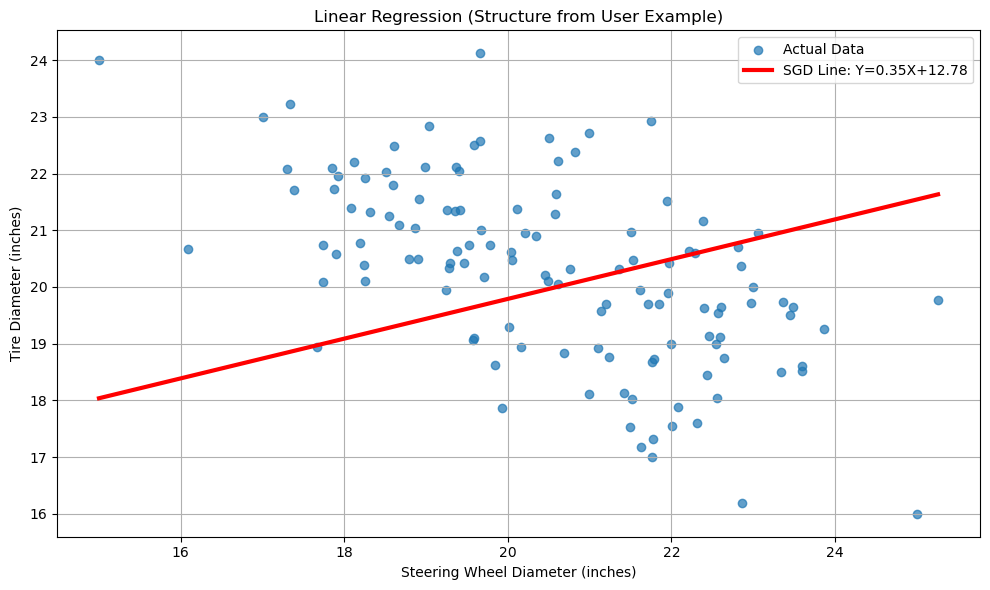

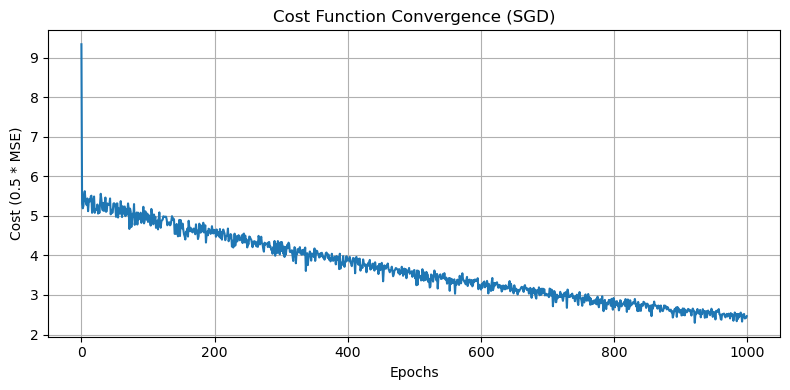

In [19]:
try:
    df = pd.read_csv("matatu_data.csv")
    print("Loaded matatu_data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

try:
    # Reshape X to be (n_samples, 1) as expected by np.dot
    X_data = df['Steering_Diameter'].values.reshape(-1, 1)
    Y_data = df['Tire_Diameter'].values
    n_features = X_data.shape[1] 
    print(f"Data prepared: {len(X_data)} samples, {n_features} feature(s).")
    print(f"X_data shape: {X_data.shape}")
    print(f"Y_data shape: {Y_data.shape}")
except KeyError as e:
    print(f"Error: Column {e} not found in CSV.")
    exit()
except Exception as e:
    print(f"Error preparing data: {e}")
    exit()

#instantiate the neuron!
identity_activation = lambda x: x
neuron = SingleNeuron(activation_function=identity_activation, n_features=n_features)

learning_rate_alpha = 0.0005
train_epochs = 1000
neuron.train(X_data, Y_data, alpha=learning_rate_alpha, epochs=train_epochs)

# Extract weights and bias from the neuron's w_ attribute
if hasattr(neuron, 'w_'): 
    final_w = neuron.w_[:-1] 
    final_b = neuron.w_[-1] 
    print(f"\nExtracted parameters: Weight(s) m = {final_w}, Bias b = {final_b:.4f}")
    valid_params = not (np.any(np.isnan(neuron.w_)) or np.any(np.isinf(neuron.w_)))
else:
    print("Training did not complete successfully. Cannot extract parameters.")
    valid_params = False


if valid_params:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_data[:, 0], Y_data, alpha=0.7, label='Actual Data')

    # Create line data
    x_line = np.linspace(X_data[:, 0].min(), X_data[:, 0].max(), 100)
    # Predict y values using the neuron
    y_line = neuron.predict(x_line.reshape(-1, 1))
    # Or manually: y_line = final_w[0] * x_line + final_b

    plt.plot(x_line, y_line, color='red', linewidth=3, label=f'SGD Line: Y={final_w[0]:.2f}X+{final_b:.2f}')
    plt.xlabel('Steering Wheel Diameter (inches)')
    plt.ylabel('Tire Diameter (inches)')
    plt.title(f'Linear Regression (Structure from User Example)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Cost History (using neuron.errors_)
    if neuron.errors_:
        plt.figure(figsize=(8, 4))
        plt.plot(range(len(neuron.errors_)), neuron.errors_)
        plt.xlabel("Epochs")
        plt.ylabel("Cost (0.5 * MSE)") 
        plt.title("Cost Function Convergence (SGD)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("Cost history was not recorded.")

else:
    print("Cannot plot results due to invalid parameters.")

As we've established previously, the **learning rate** (often represented by the symbol $\alpha$) stands out as a particularly crucial **hyperparameter** when utilizing optimization algorithms like Gradient Descent and its stochastic variants (SGD). This parameter governs the magnitude of the adjustment applied to the model's weights and bias during each iteration, essentially controlling the step size as we navigate towards the minimum of the cost function.

The choice of learning rate involves a critical trade-off. Setting it **too high** can cause the algorithm to take excessively large steps, potentially overshooting the optimal solution and leading to oscillations where the cost bounces around or even diverges (increases uncontrollably). On the other hand, setting the learning rate **too low** results in very small steps, which can make the convergence process extremely slow, potentially requiring an impractical number of epochs to reach a good solution or getting stuck more easily.
